In [3]:
import network as net
from loader import load_train_data, load_test_data, export_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time 

train, valid = load_train_data('train.csv', valid_size=.2)
# train = load_train_data('train.csv')

test = load_test_data("test.csv")
netw = net.Network([784, 100, 1000, 10])

acc, cf = netw.SGD(train, 2.714, 30, 30, return_results=True, test_data=valid)
net.visualisation(acc, cf, 30)

# netw.SGD(train, 2.714, 30, 30)
# export_data("last_ver.csv", netw.predict(test))

Epoch 1 complete 
Epoch 2 complete 
Epoch 3 complete 
Epoch 4 complete 
Epoch 5 complete 
Epoch 6 complete 
Epoch 7 complete 
Epoch 8 complete 
Epoch 9 complete 
Epoch 10 complete 
Epoch 11 complete 
Epoch 12 complete 
Epoch 13 complete 
Epoch 14 complete 
Epoch 15 complete 
Epoch 16 complete 
Epoch 17 complete 
Epoch 18 complete 
Epoch 19 complete 
Epoch 20 complete 
Epoch 21 complete 
Epoch 22 complete 
Epoch 23 complete 
Epoch 24 complete 
Epoch 25 complete 
Epoch 26 complete 
Epoch 27 complete 
Epoch 28 complete 
Epoch 29 complete 
Epoch 30 complete 


Epoch 1 complete with accuracity 7328/8400 = 0.8723809523809524
Epoch 1 complete with accuracity 7279/8400 = 0.866547619047619
Epoch 1 complete with accuracity 7340/8400 = 0.8738095238095238
Epoch 1 complete with accuracity 7275/8400 = 0.8660714285714286
Epoch 1 complete with accuracity 7318/8400 = 0.8711904761904762
Epoch 1 complete with accuracity 7430/8400 = 0.8845238095238095
Epoch 1 complete with accuracity 7363/8400 = 0.876547619047619
Epoch 1 complete with accuracity 7376/8400 = 0.878095238095238
Epoch 1 complete with accuracity 7324/8400 = 0.871904761904762
Epoch 1 complete with accuracity 7307/8400 = 0.8698809523809524
Epoch 1 complete with accuracity 7278/8400 = 0.8664285714285714
Epoch 1 complete with accuracity 7382/8400 = 0.8788095238095238
Epoch 1 complete with accuracity 7314/8400 = 0.8707142857142857
Epoch 1 complete with accuracity 7321/8400 = 0.871547619047619
Epoch 1 complete with accuracity 7332/8400 = 0.8728571428571429
Epoch 1 complete with accuracity 7338/8400 = 

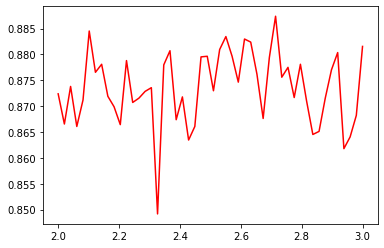

In [10]:
r = np.linspace(2, 3, 50)
dat = []
for i in r:
    train, valid= load_train_data('train.csv', valid_size=.2, random_state=42)
    netw = net.Network([784, 16, 16, 10], random_state=42)
    acc, cf = netw.SGD(train, i, 1, 30, test_data=valid, return_results=True)
    dat.append(acc)

# net.visualisation(acc, cf, 30)
# export_data("last_ver.csv", netw.predict(test))

plt.plot(r, dat, color="red")

In [11]:
j = np.array(dat).argmax()
r[j]

2.7142857142857144